In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('Hepatitis.csv') # 분석할 데이터 불러오기
X = df.iloc[:, :-1] # 독립변수 matrix
y = df.iloc[:, -1] # 종속변수 matrix

In [3]:
# 독립변수가 연속형인 데이터
X_num = df.iloc[:, [0, 13, 14, 15, 16, 17]]
# 독립변수가 이산형인 데이터
X_cat = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18]]

In [4]:
tmp_df = X_cat # 이산형 데이터는 임시로 다른 곳에 저장
final_X = X_num # 연속형 데이터는 dummy 변수가 필요 없으므로 분석할 데이터에 저장

# 이산형 데이터를 하나씩 dummy 변수로 변환하는 작업 수행
for i in X_cat.columns:
    cat_list = pd.get_dummies(tmp_df[i], drop_first = True, prefix = i)
    final_X = """작성""" # dummy 변수로 만든 이산형 데이터를 분석용 데이터에 합치기

In [5]:
# CART (for classification) 함수 import
"""작성"""
# k-fold cross-validation 함수 import
from sklearn.model_selection import KFold

In [6]:
# scaling 함수 import
from sklearn.preprocessing import StandardScaler

In [7]:
# parameter 조합 경우의 수
msl_value = """작성""" # min_samples_leaf가 각각 10, 15, 20인 경우
md_value = """작성""" # max_depth가 각각 2, 3, 5인 경우

pd_value = """작성"""
pd_value

array([[10,  2],
       [10,  3],
       [10,  5],
       [15,  2],
       [15,  3],
       [15,  5],
       [20,  2],
       [20,  3],
       [20,  5]])

In [9]:
n_iter = 10 # 전체 실험 반복 횟수

iter_train_result = [] # training set의 전체 값 초기화
iter_test_result = [] # test set의 전체 값 초기화

for epoch in np.arange(n_iter):
    
    cv = KFold(n_splits = 5, shuffle = True) # 5-fold cv 함수 입력
    
    fold_train_result = [] # training set의 5-fold R-squared 값 초기화
    fold_test_result = [] # test set의 5-fold R-squared 값 초기화
    
    for tr_idx, te_idx in cv.split(final_X):
        
        X_train = final_X.iloc[tr_idx] # cross-validation index를 통한 독립변수 training set
        X_test = final_X.iloc[te_idx] # cross-validation index를 통한 독립변수 test set
        y_train = y[tr_idx] # cross-validation index를 통한 종속변수 training set
        y_test = y[te_idx] # cross-validation index를 통한 종속변수 test set
        
        scaler = StandardScaler() # scaler 함수 명명
        scaler = scaler.fit(X_train.iloc[:, 0:np.shape(X_num)[1]]) # scaler 함수 fitting
        # training set 내 연속형 데이터의 scaling
        zs_X_train = scaler.transform(X_train.iloc[:, 0:np.shape(X_num)[1]])
        # training set의 연속형과 이산형 데이터 합치기
        zs_X_train = np.c_[zs_X_train, X_train.iloc[:, np.shape(X_num)[1]:].values]
        
        # test set 내 연속형 데이터의 scaling (training set의 정보 이용)
        zs_X_test = scaler.transform(X_test.iloc[:, 0:np.shape(X_num)[1]])
        # test set의 연속형과 이산형 데이터 합치기
        zs_X_test = np.c_[zs_X_test, X_test.iloc[:, np.shape(X_num)[1]:].values]
        
        # pd_value의 parameter들로 CART 모형 학습
        for """작성""" in """작성""":
            
            # CART 함수 명명 및 parameter 입력
            dtree_cls = """작성"""
            dtree_cls = dtree_cls.fit(zs_X_train, y_train) # CART 예측 모형 학습
            
            # 5-fold의 parameter 별 training set 학습 결과 저장
            fold_train_result = fold_train_result + [dtree_cls.score(zs_X_train, y_train)]
            # 5-fold의 parameter 별 test set 학습 결과 저장
            fold_test_result = fold_test_result + [dtree_cls.score(zs_X_test, y_test)]
            
    # training set의 결과 구성을 5-fold by parameter 수로 재배열 (5 by 9 matrix)
    fold_train_result = np.array(fold_train_result).reshape(cv.get_n_splits(final_X), len(list(pd_value)))
    # 5-fold training set의 R-squared 값 평균
    fold_train_result = np.mean(fold_train_result, axis = 0)
    # test set의 결과 구성을 5-fold by parameter 수로 재배열 (5 by 9 matrix)
    fold_test_result = np.array(fold_test_result).reshape(cv.get_n_splits(final_X), len(list(pd_value)))
    # 5-fold test set의 R-squared 값 평균
    fold_test_result = np.mean(fold_test_result, axis = 0)
    
    iter_train_result = iter_train_result + [fold_train_result]
    iter_test_result = iter_test_result + [fold_test_result]

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler

In [10]:
# training set의 CART 결과값 (평균값 & 표준편차)
train_mean = np.mean(iter_train_result, axis = 0)
train_mean
train_std = np.std(iter_train_result, axis = 0)
train_std

array([0.8759375, 0.8759375, 0.8759375, 0.855625 , 0.855625 , 0.855625 ,
       0.839375 , 0.839375 , 0.839375 ])

array([0.00791187, 0.00791187, 0.00791187, 0.00621867, 0.00621867,
       0.00621867, 0.00286411, 0.00286411, 0.00286411])

In [11]:
# test set의 CART 결과값 (평균값 & 표준편차)
test_mean = np.mean(iter_test_result, axis = 0)
test_mean
test_std = np.std(iter_test_result, axis = 0)
test_std

array([0.79875, 0.8    , 0.80125, 0.79125, 0.79125, 0.79125, 0.78625,
       0.78625, 0.78625])

array([0.01807104, 0.01581139, 0.01419727, 0.02168669, 0.02168669,
       0.02168669, 0.02981715, 0.02981715, 0.02981715])

In [31]:
# training set과 test set의 parameter 별 결과
Final_Results = """작성"""
Final_Results

,0,1,2,3,4,5,6,7,8
train_mean,0.875938,0.875938,0.875938,0.855625,0.855625,0.855625,0.839375,0.839375,0.839375
test_mean,0.798750,0.800000,0.801250,0.791250,0.791250,0.791250,0.786250,0.786250,0.786250


In [36]:
# 예측모형의 성능을 가장 좋게 하는 paramter index 찾기
"""작성"""

2

In [48]:
# parameter index를 통해 min_samples_leaf와 max_depth 찾기
"""작성"""

array([10,  5])

In [40]:
# 위에서 찾은 parameter를 통해 전체 데이터에 다시 모델 학습하기
# 여기서는 5-fold cv 없이 전체 데이터로만 만들기
dtree_cls = DecisionTreeClassifier(min_samples_leaf = pd_value[np.where(test_mean == np.max(test_mean))[0][0]][0], max_depth = pd_value[np.where(test_mean == np.max(test_mean))[0][0]][1])
dtree_cls = dtree_cls.fit(final_X, y)

In [41]:
# training set을 통해 학습된 독립변수 중요도
dtree_cls.feature_importances_

array([0.        , 0.        , 0.        , 0.10854767, 0.        ,
       0.8261964 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06525593])

In [43]:
final_X.iloc[:, np.where(dtree_cls.feature_importances_ > 0)[-1]]

,X16,X18,X19_2
0,98,40,0
1,157,38,1
2,23,66,1
3,157,31,1
4,20,46,1
5,80,31,1
6,68,29,1
7,75,32,1
8,55,30,1
9,49,90,1


In [46]:
# CART의 시각화를 위한 graphviz 함수 import
import graphviz
# dot_data를 만드는 export-graphviz 함수 import
"""작성"""
dot_data = export_graphviz(dtree_cls, out_file=None) # CART 분지 구조 저장

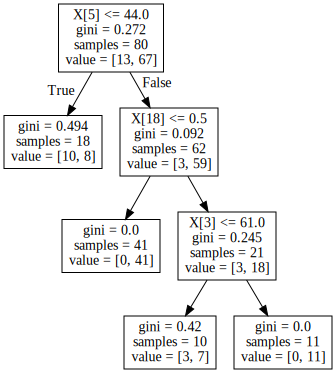

In [47]:
# CART 분지 구조를 통한 시각화
graph = """작성"""
graph

In [ ]:
# 여기서 부터는 PBC라는 데이터에 적용
# 분석하는 방식은 위와 동일함

In [49]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [50]:
df = pd.read_csv('PBC.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_num = df.iloc[:, [0, 2, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
X_cat = df.iloc[:, [1, 3, 4, 5, 6, 7, 17]]

tmp_df = X_cat
final_X = X_num

for i in X_cat.columns:
    cat_list = pd.get_dummies(tmp_df[i], drop_first = True, prefix = i)
    final_X = final_X.join(cat_list)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [52]:
n_iter = 10

iter_train_result = []
iter_test_result = []

msl_value = np.array([10, 15, 20])
md_value = np.array([2, 3, 5])

from itertools import product

pd_value = pd_value = np.transpose([np.repeat(msl_value, len(md_value)), np.tile(md_value, len(msl_value))])

for epoch in np.arange(n_iter):
    
    cv = KFold(n_splits = 5, shuffle = True)
    
    fold_train_result = []
    fold_test_result = []
    
    for tr_idx, te_idx in cv.split(final_X):
        
        X_train = final_X.iloc[tr_idx]
        X_test = final_X.iloc[te_idx]
        y_train = y[tr_idx]
        y_test = y[te_idx]
        
        scaler = StandardScaler()
        scaler = scaler.fit(X_train.iloc[:, 0:np.shape(X_num)[1]])
        zs_X_train = scaler.transform(X_train.iloc[:, 0:np.shape(X_num)[1]])
        zs_X_train = np.c_[zs_X_train, X_train.iloc[:, np.shape(X_num)[1]:].values]
        
        zs_X_test = scaler.transform(X_test.iloc[:, 0:np.shape(X_num)[1]])
        zs_X_test = np.c_[zs_X_test, X_test.iloc[:, np.shape(X_num)[1]:].values]
        
        for t in pd_value:
            
            dtree_cls = DecisionTreeClassifier(min_samples_leaf = t[0], max_depth = t[1])
            dtree_cls = dtree_cls.fit(zs_X_train, y_train)
            
            fold_train_result = fold_train_result + [dtree_cls.score(zs_X_train, y_train)]
            fold_test_result = fold_test_result + [dtree_cls.score(zs_X_test, y_test)]
            
    # (5 by 9)
    fold_train_result = np.mean(np.array(fold_train_result).reshape(cv.get_n_splits(final_X), len(list(pd_value))), axis = 0)
    fold_test_result = np.mean(np.array(fold_test_result).reshape(cv.get_n_splits(final_X), len(list(pd_value))), axis = 0)
    
    iter_train_result = iter_train_result + [fold_train_result]
    iter_test_result = iter_test_result + [fold_test_result]

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler

In [53]:
train_mean = np.mean(iter_train_result, axis = 0)
train_mean
train_std = np.std(iter_train_result, axis = 0)
train_std

array([0.74710777, 0.78180049, 0.80172522, 0.74230605, 0.76494858,
       0.77382147, 0.73967997, 0.75072974, 0.75462155])

array([0.00294602, 0.00382799, 0.00517543, 0.00447868, 0.00316732,
       0.00706379, 0.0037368 , 0.00432379, 0.00635858])

In [54]:
test_mean = np.mean(iter_test_result, axis = 0)
test_mean
test_std = np.std(iter_test_result, axis = 0)
test_std

array([0.69064935, 0.68814286, 0.68051299, 0.69173377, 0.70440909,
       0.69786364, 0.69283766, 0.70003896, 0.69711688])

array([0.01193262, 0.014411  , 0.01826799, 0.01169837, 0.01572696,
       0.01641169, 0.01030162, 0.0196105 , 0.0175267 ])

In [66]:
Final_Results = pd.DataFrame([train_mean, test_mean], index = ['train_mean', 'test_mean'])
Final_Results

,0,1,2,3,4,5,6,7,8
train_mean,0.747108,0.781800,0.801725,0.742306,0.764949,0.773821,0.739680,0.750730,0.754622
test_mean,0.690649,0.688143,0.680513,0.691734,0.704409,0.697864,0.692838,0.700039,0.697117


In [64]:
np.where(test_mean == np.max(test_mean))[0][0]

4

In [67]:
# parameter index를 통해 min_samples_leaf와 max_depth 찾기
pd_value[np.where(test_mean == np.max(test_mean))[0][0]]

array([15,  3])

In [57]:
dtree_cls = DecisionTreeClassifier(min_samples_leaf = pd_value[np.where(test_mean == np.max(test_mean))[-1][-1]][0], max_depth = pd_value[np.where(test_mean == np.max(test_mean))[-1][-1]][1])
dtree_cls = dtree_cls.fit(final_X, y)

In [58]:
dtree_cls.feature_importances_

array([0.54894361, 0.09139757, 0.15768423, 0.        , 0.00142488,
       0.        , 0.11045   , 0.        , 0.        , 0.        ,
       0.09009971, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [59]:
final_X.iloc[:, np.where(dtree_cls.feature_importances_ > 0)[-1]]

,X1,X3,X9,X11,X13,X17
0,4500,20617,1.1,4.14,7394.8,10.6
1,1832,20284,1.0,4.09,824.0,9.7
2,3577,16688,0.7,3.85,1181.0,10.6
3,3672,14772,0.7,3.66,685.0,10.8
4,4232,18102,0.7,3.56,1881.0,11.0
5,3445,23445,0.6,3.83,843.0,11.4
6,4127,16463,0.7,4.10,661.0,11.3
7,4509,23331,0.7,3.78,5833.0,10.6
8,4523,19722,1.8,3.34,7277.0,10.6
9,3933,19015,0.8,3.70,1840.0,10.5


In [60]:
import graphviz
from sklearn.tree import export_graphviz

In [61]:
dot_data = export_graphviz(dtree_cls, out_file=None)

In [62]:
graph = graphviz.Source(dot_data)

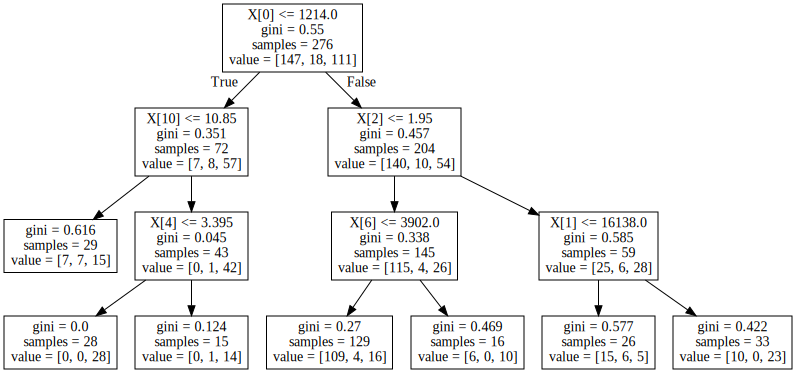

In [63]:
graph